In [6]:
#The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered 
#so that the face is more or less centered and occupies about the same amount of space in each image. 
#The task is to categorize each face based on the emotion shown in the facial expression in to one of 
#seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).

#dataset can be downloaded from: 
#https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/overview
#Babak Rahi

# this file makes use of the "utils.py" file Also in the repository

#Babak Rahi

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from utils import getData, softmax, cost, y2indicator, error_rate
from sklearn.utils import shuffle

In [3]:
class LogisticModel(object):
    def __init__(self):
        pass
    
    def fit(self, X, Y, learning_rate = 10e-8, reg=10e-12, epochs=10000, show_fig = False):
        X, Y = shuffle(X, Y)
        Xvalid, Yvalid = X[-1000:], Y[-1000:]
        Tvalid = y2indicator(Yvalid)
        X, Y = X[:-1000], Y[:-1000]
        N, D = X.shape
        K = len(set(Y))
        T = y2indicator(Y)
        self.W = np.random.randn(D, K) / np.sqrt(D + K)
        self.b = np.zeros(K)
        
        costs = []
        best_validation_error = 1
        for i in range(epochs):
            pY = self.forward(X)
            
            self.W -= learning_rate * (X.T.dot(pY-T) + reg*self.W)
            self.b -= learning_rate * (np.sum(pY-T, axis=0) + reg*self.b)
            
            if i % 10 == 0:
                pY_valid = self.forward(Xvalid)
                c = cost(Tvalid, pY_valid)
                costs.append(c)
                e = error_rate(Yvalid, np.argmax(pY_valid, axis=1))
                print("i:", i, "cost:", c, "error:", e)
                if e < best_validation_error:
                    best_validation_error = e
        print("Best validation Error:", best_validation_error)
        
        if show_fig:
            plt.plot(costs)
            plt.show() 
                
                
    def forward(self, X):
        return softmax(X.dot(self.W) + self.b)
    
    def predict(self, X):
        pY = self.forward(X)
        return np.argmax(pY, axis=1)
    
    def score(self, X, Y):
        prediction = self.predict(X)
        return 1 - error_rate(Y, prediction)    

i: 0 cost: 1938.8566355046141 error: 0.837
i: 10 cost: 1934.7965110593723 error: 0.794
i: 20 cost: 1931.502895195734 error: 0.798
i: 30 cost: 1928.288852660481 error: 0.797
i: 40 cost: 1925.3246954180065 error: 0.794
i: 50 cost: 1922.5766644122607 error: 0.793
i: 60 cost: 1920.0108813586996 error: 0.794
i: 70 cost: 1917.5994111819598 error: 0.786
i: 80 cost: 1915.3193813718688 error: 0.787
i: 90 cost: 1913.152039831518 error: 0.788
i: 100 cost: 1911.0819791087883 error: 0.784
i: 110 cost: 1909.096506592935 error: 0.783
i: 120 cost: 1907.1851346768165 error: 0.781
i: 130 cost: 1905.3391686062134 error: 0.78
i: 140 cost: 1903.551373490473 error: 0.779
i: 150 cost: 1901.8157052567306 error: 0.777
i: 160 cost: 1900.1270931505123 error: 0.776
i: 170 cost: 1898.481263742157 error: 0.778
i: 180 cost: 1896.8745983400638 error: 0.776
i: 190 cost: 1895.3040172955655 error: 0.775
i: 200 cost: 1893.7668859671023 error: 0.774
i: 210 cost: 1892.2609381453794 error: 0.772
i: 220 cost: 1890.7842135717

i: 1830 cost: 1783.6924102318517 error: 0.686
i: 1840 cost: 1783.373304631729 error: 0.685
i: 1850 cost: 1783.0561037438529 error: 0.684
i: 1860 cost: 1782.7407879663106 error: 0.684
i: 1870 cost: 1782.427337961715 error: 0.684
i: 1880 cost: 1782.1157346529342 error: 0.684
i: 1890 cost: 1781.8059592189034 error: 0.684
i: 1900 cost: 1781.497993090515 error: 0.684
i: 1910 cost: 1781.191817946584 error: 0.684
i: 1920 cost: 1780.8874157098912 error: 0.683
i: 1930 cost: 1780.5847685432973 error: 0.681
i: 1940 cost: 1780.2838588459304 error: 0.681
i: 1950 cost: 1779.984669249444 error: 0.679
i: 1960 cost: 1779.6871826143436 error: 0.679
i: 1970 cost: 1779.3913820263797 error: 0.679
i: 1980 cost: 1779.0972507930082 error: 0.679
i: 1990 cost: 1778.8047724399148 error: 0.679
i: 2000 cost: 1778.5139307076029 error: 0.679
i: 2010 cost: 1778.2247095480411 error: 0.679
i: 2020 cost: 1777.9370931213762 error: 0.679
i: 2030 cost: 1777.6510657927001 error: 0.678
i: 2040 cost: 1777.366612128878 error: 

i: 3630 cost: 1745.2946409445976 error: 0.661
i: 3640 cost: 1745.1476788983914 error: 0.661
i: 3650 cost: 1745.001174894558 error: 0.661
i: 3660 cost: 1744.8551262109995 error: 0.66
i: 3670 cost: 1744.7095301494332 error: 0.661
i: 3680 cost: 1744.5643840351272 error: 0.661
i: 3690 cost: 1744.4196852166424 error: 0.66
i: 3700 cost: 1744.2754310655775 error: 0.66
i: 3710 cost: 1744.1316189763156 error: 0.66
i: 3720 cost: 1743.9882463657768 error: 0.66
i: 3730 cost: 1743.8453106731713 error: 0.66
i: 3740 cost: 1743.7028093597564 error: 0.66
i: 3750 cost: 1743.5607399085986 error: 0.66
i: 3760 cost: 1743.4190998243353 error: 0.66
i: 3770 cost: 1743.2778866329422 error: 0.66
i: 3780 cost: 1743.1370978815028 error: 0.66
i: 3790 cost: 1742.99673113798 error: 0.66
i: 3800 cost: 1742.856783990992 error: 0.66
i: 3810 cost: 1742.7172540495903 error: 0.66
i: 3820 cost: 1742.5781389430404 error: 0.66
i: 3830 cost: 1742.4394363206043 error: 0.66
i: 3840 cost: 1742.30114385133 error: 0.661
i: 3850 co

i: 5430 cost: 1724.342748968681 error: 0.654
i: 5440 cost: 1724.249561022807 error: 0.654
i: 5450 cost: 1724.1565675126794 error: 0.654
i: 5460 cost: 1724.0637676975957 error: 0.654
i: 5470 cost: 1723.9711608411992 error: 0.654
i: 5480 cost: 1723.878746211447 error: 0.654
i: 5490 cost: 1723.7865230805746 error: 0.654
i: 5500 cost: 1723.694490725062 error: 0.654
i: 5510 cost: 1723.6026484256 error: 0.652
i: 5520 cost: 1723.5109954670565 error: 0.652
i: 5530 cost: 1723.4195311384453 error: 0.652
i: 5540 cost: 1723.3282547328909 error: 0.652
i: 5550 cost: 1723.2371655475981 error: 0.652
i: 5560 cost: 1723.146262883819 error: 0.652
i: 5570 cost: 1723.055546046821 error: 0.652
i: 5580 cost: 1722.9650143458578 error: 0.652
i: 5590 cost: 1722.8746670941334 error: 0.651
i: 5600 cost: 1722.784503608777 error: 0.651
i: 5610 cost: 1722.694523210808 error: 0.651
i: 5620 cost: 1722.6047252251083 error: 0.651
i: 5630 cost: 1722.515108980391 error: 0.651
i: 5640 cost: 1722.4256738091715 error: 0.65
i

i: 7230 cost: 1710.1370330517502 error: 0.633
i: 7240 cost: 1710.0699789561602 error: 0.633
i: 7250 cost: 1710.0030330720792 error: 0.633
i: 7260 cost: 1709.936195096011 error: 0.633
i: 7270 cost: 1709.869464725727 error: 0.633
i: 7280 cost: 1709.8028416602617 error: 0.633
i: 7290 cost: 1709.736325599902 error: 0.633
i: 7300 cost: 1709.6699162461832 error: 0.633
i: 7310 cost: 1709.6036133018783 error: 0.633
i: 7320 cost: 1709.5374164709947 error: 0.633
i: 7330 cost: 1709.4713254587637 error: 0.633
i: 7340 cost: 1709.4053399716358 error: 0.633
i: 7350 cost: 1709.3394597172733 error: 0.633
i: 7360 cost: 1709.2736844045417 error: 0.633
i: 7370 cost: 1709.2080137435055 error: 0.633
i: 7380 cost: 1709.1424474454193 error: 0.633
i: 7390 cost: 1709.076985222722 error: 0.633
i: 7400 cost: 1709.0116267890296 error: 0.633
i: 7410 cost: 1708.946371859129 error: 0.633
i: 7420 cost: 1708.8812201489711 error: 0.633
i: 7430 cost: 1708.816171375665 error: 0.632
i: 7440 cost: 1708.751225257469 error: 0

i: 9030 cost: 1699.565161580907 error: 0.629
i: 9040 cost: 1699.5136630701709 error: 0.629
i: 9050 cost: 1699.462233321095 error: 0.629
i: 9060 cost: 1699.4108721775208 error: 0.629
i: 9070 cost: 1699.3595794838006 error: 0.629
i: 9080 cost: 1699.3083550847973 error: 0.629
i: 9090 cost: 1699.2571988258796 error: 0.629
i: 9100 cost: 1699.2061105529233 error: 0.629
i: 9110 cost: 1699.1550901123046 error: 0.629
i: 9120 cost: 1699.1041373509015 error: 0.629
i: 9130 cost: 1699.0532521160906 error: 0.627
i: 9140 cost: 1699.0024342557442 error: 0.626
i: 9150 cost: 1698.9516836182286 error: 0.626
i: 9160 cost: 1698.9010000524024 error: 0.626
i: 9170 cost: 1698.850383407614 error: 0.625
i: 9180 cost: 1698.799833533699 error: 0.625
i: 9190 cost: 1698.749350280979 error: 0.625
i: 9200 cost: 1698.6989335002588 error: 0.625
i: 9210 cost: 1698.6485830428246 error: 0.625
i: 9220 cost: 1698.598298760442 error: 0.625
i: 9230 cost: 1698.548080505354 error: 0.625
i: 9240 cost: 1698.497928130278 error: 0.

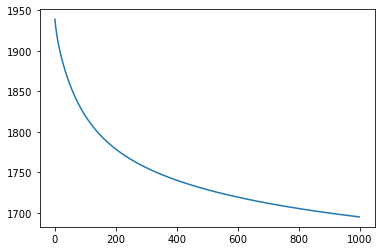

0.37148188859633424


In [5]:
def main():
    X, Y, Xv, Yv = getData()
    
    model = LogisticModel()
    model.fit(X, Y, show_fig = True)
    print (model.score(X, Y))
    
if __name__ == '__main__':
    main()